In [ ]:
import os as os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import operator
from operator import itemgetter
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
%matplotlib inline

In [ ]:
import tensorflow as tf
from tensorflow import keras
import time
from PIL import Image

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
import tensorflow.keras.layers as layers
import tensorflow.keras.applications as applications
from tensorflow.keras import datasets, losses

In [ ]:
# Project paths, this will change from the move to GitHub, be wary
# Likely do not need projectPath or projectSharedDrivePath
projectPath = '/content/drive/MyDrive/Colab Notebooks/Data'
projectSharedDrivePath = '/content/drive/Shareddrives/CAP5610 Project'
imagesPart1_dir = projectSharedDrivePath + '/data/HAM10000_images_part_1_original'
imagesPart1Aug_dir = projectSharedDrivePath + '/data/HAM10000_images_part_1'
imagesPart2_dir = projectSharedDrivePath + '/data/HAM10000_images_part_2'

In [ ]:
# View files in project path
img_dirs = os.listdir(projectPath)
img_dirs

['HAM10000_metadata.csv',
 'hmnist_8_8_L.csv',
 'hmnist_8_8_RGB.csv',
 'hmnist_28_28_L.csv',
 'hmnist_28_28_RGB.csv',
 'HAM10000_images_part_2',
 '.ipynb_checkpoints',
 'HAM10000_metadata_labels.csv',
 'HAM10000_metadata_labels_part2.csv',
 'HAM10000_metadata_labels_part1.csv',
 'Andres',
 'HAM10000_images_part_1']

In [ ]:
os.getcwd()

'/content'

In [ ]:
imagesPart1_dir = projectPath + '\HAM10000_images_part_1'
imagesPart2_dir = projectPath + '\HAM10000_images_part_1'

In [ ]:
### 28x28 RGB Processing
df_hmnist_28_28_RGB = pd.read_csv(projectPath + '/hmnist_28_28_RGB.csv/hmnist_28_28_RGB.csv')
df_hmnist_28_28_RGB.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,pixel0010,pixel0011,pixel0012,pixel0013,pixel0014,pixel0015,pixel0016,pixel0017,pixel0018,pixel0019,pixel0020,pixel0021,pixel0022,pixel0023,pixel0024,pixel0025,pixel0026,pixel0027,pixel0028,pixel0029,pixel0030,pixel0031,pixel0032,pixel0033,pixel0034,pixel0035,pixel0036,pixel0037,pixel0038,pixel0039,...,pixel2313,pixel2314,pixel2315,pixel2316,pixel2317,pixel2318,pixel2319,pixel2320,pixel2321,pixel2322,pixel2323,pixel2324,pixel2325,pixel2326,pixel2327,pixel2328,pixel2329,pixel2330,pixel2331,pixel2332,pixel2333,pixel2334,pixel2335,pixel2336,pixel2337,pixel2338,pixel2339,pixel2340,pixel2341,pixel2342,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,162,192,208,165,201,209,165,205,208,165,194,212,169,198,216,181,204,216,178,204,215,172,205,217,173,209,217,166,202,214,...,216,181,212,215,176,208,213,168,191,209,159,184,212,168,194,212,172,198,208,173,193,203,168,183,190,142,152,177,123,134,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,128,158,172,136,162,175,134,157,177,126,158,186,138,163,197,153,187,198,153,186,203,168,206,205,169,204,207,164,199,205,...,209,176,203,207,171,191,208,172,197,205,169,188,198,159,172,200,159,192,191,140,182,177,128,141,147,101,97,113,79,82,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,149,165,207,149,159,209,156,164,202,136,130,200,133,129,208,146,157,212,159,167,214,157,168,211,143,150,215,148,169,213,...,221,168,175,222,170,188,221,167,184,203,144,155,201,146,155,210,163,177,190,142,152,192,152,172,194,153,176,178,134,149,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,125,134,177,118,123,190,137,146,192,127,143,200,141,162,207,156,170,202,144,151,202,138,155,212,159,177,211,155,172,211,...,181,137,145,189,147,166,192,157,185,169,129,144,148,114,122,157,125,137,157,127,147,154,128,147,130,102,114,87,63,73,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,179,214,232,189,222,235,193,219,234,191,206,238,200,219,244,213,240,243,213,239,242,210,238,244,216,241,247,224,244,246,...,238,195,209,237,191,200,238,194,201,239,197,216,238,195,219,232,179,201,217,150,173,224,171,207,227,177,206,222,178,201,209,166,185,172,135,149,109,78,92,2


In [ ]:
df_hmnist_28_28_RGB_Labels = np.asarray(df_hmnist_28_28_RGB['label'])
df_hmnist_28_28_RGB = df_hmnist_28_28_RGB.drop('label',axis=1)
df_hmnist_28_28_RGB.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,pixel0010,pixel0011,pixel0012,pixel0013,pixel0014,pixel0015,pixel0016,pixel0017,pixel0018,pixel0019,pixel0020,pixel0021,pixel0022,pixel0023,pixel0024,pixel0025,pixel0026,pixel0027,pixel0028,pixel0029,pixel0030,pixel0031,pixel0032,pixel0033,pixel0034,pixel0035,pixel0036,pixel0037,pixel0038,pixel0039,...,pixel2312,pixel2313,pixel2314,pixel2315,pixel2316,pixel2317,pixel2318,pixel2319,pixel2320,pixel2321,pixel2322,pixel2323,pixel2324,pixel2325,pixel2326,pixel2327,pixel2328,pixel2329,pixel2330,pixel2331,pixel2332,pixel2333,pixel2334,pixel2335,pixel2336,pixel2337,pixel2338,pixel2339,pixel2340,pixel2341,pixel2342,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351
0,192,153,193,195,155,192,197,154,185,202,162,192,208,165,201,209,165,205,208,165,194,212,169,198,216,181,204,216,178,204,215,172,205,217,173,209,217,166,202,214,...,217,216,181,212,215,176,208,213,168,191,209,159,184,212,168,194,212,172,198,208,173,193,203,168,183,190,142,152,177,123,134,173,124,138,183,147,166,185,154,177
1,25,14,30,68,48,75,123,93,126,158,128,158,172,136,162,175,134,157,177,126,158,186,138,163,197,153,187,198,153,186,203,168,206,205,169,204,207,164,199,205,...,187,209,176,203,207,171,191,208,172,197,205,169,188,198,159,172,200,159,192,191,140,182,177,128,141,147,101,97,113,79,82,60,39,55,25,14,28,25,14,27
2,192,138,153,200,145,163,201,142,160,206,149,165,207,149,159,209,156,164,202,136,130,200,133,129,208,146,157,212,159,167,214,157,168,211,143,150,215,148,169,213,...,176,221,168,175,222,170,188,221,167,184,203,144,155,201,146,155,210,163,177,190,142,152,192,152,172,194,153,176,178,134,149,167,129,143,159,124,142,136,104,117
3,38,19,30,95,59,72,143,103,119,171,125,134,177,118,123,190,137,146,192,127,143,200,141,162,207,156,170,202,144,151,202,138,155,212,159,177,211,155,172,211,...,160,181,137,145,189,147,166,192,157,185,169,129,144,148,114,122,157,125,137,157,127,147,154,128,147,130,102,114,87,63,73,44,26,36,25,12,17,25,12,15
4,158,113,139,194,144,174,215,162,191,225,179,214,232,189,222,235,193,219,234,191,206,238,200,219,244,213,240,243,213,239,242,210,238,244,216,241,247,224,244,246,...,219,238,195,209,237,191,200,238,194,201,239,197,216,238,195,219,232,179,201,217,150,173,224,171,207,227,177,206,222,178,201,209,166,185,172,135,149,109,78,92


In [ ]:
hmnist_28_28_RGB = np.asarray(df_hmnist_28_28_RGB)
hmnist_28_28_RGB.shape

(10015, 2352)

In [ ]:
hmnist_28_28_RGB[0:10]

array([[192, 153, 193, ..., 185, 154, 177],
       [ 25,  14,  30, ...,  25,  14,  27],
       [192, 138, 153, ..., 136, 104, 117],
       ...,
       [161, 121, 105, ...,  32,  18,  19],
       [125,  84,  85, ...,  19,   8,  13],
       [228, 179, 194, ..., 216, 146, 154]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(hmnist_28_28_RGB, df_hmnist_28_28_RGB_Labels, test_size=0.30, random_state=101)

In [ ]:
X_train.shape

(7010, 2352)

In [ ]:
X_train = X_train.reshape(X_train.shape[0],28,28,3)
X_train.shape

(7010, 28, 28, 3)

In [ ]:
X_test = X_test.reshape(X_test.shape[0],28,28,3)
X_test.shape

(3005, 28, 28, 3)

In [ ]:
X_train = tf.convert_to_tensor(X_train, np.float64)
type(X_train)

tensorflow.python.framework.ops.EagerTensor

In [ ]:
X_test = tf.convert_to_tensor(X_test, np.float64)
type(X_test)

tensorflow.python.framework.ops.EagerTensor

In [ ]:
X_train = tf.pad(X_train, [[0, 0], [2,2],[2,2],[0,0]])/255
X_test = tf.pad(X_test, [[0, 0], [2,2],[2,2],[0,0]])/255

In [ ]:
print(X_train.shape)
print(X_test.shape)

(7010, 32, 32, 3)
(3005, 32, 32, 3)


In [ ]:
### 28x28 L Processing
df_hmnist_28_28_L = pd.read_csv(projectPath + '/hmnist_28_28_L.csv/hmnist_28_28_L.csv')
df_hmnist_28_28_L.head()

df_hmnist_28_28_L_Labels = np.asarray(df_hmnist_28_28_L['label'])
df_hmnist_28_28_L = df_hmnist_28_28_L.drop('label',axis=1)
df_hmnist_28_28_L.head()

hmnist_28_28_L = np.asarray(df_hmnist_28_28_L)
hmnist_28_28_L.shape

X_train_L, X_test_L, y_train_L, y_test_L = train_test_split(hmnist_28_28_L, df_hmnist_28_28_L_Labels, test_size=0.30, random_state=101)

print("X-train-L shape = " + str(X_train_L.shape))

X_train_L = X_train_L.reshape(X_train_L.shape[0],28,28,1)
print("X-train-L shape = " + str(X_train_L.shape))

X_test_L = X_test_L.reshape(X_test_L.shape[0],28,28,1)
print("X-test-L shape = " + str(X_test_L.shape))

X_train_L = tf.convert_to_tensor(X_train_L, np.float64)
print("X-train-L type = " + str(type(X_train_L)))

X_test_L = tf.convert_to_tensor(X_test_L, np.float64)
print("X-test-L type = " + str(type(X_test_L)))

X_train_L = tf.pad(X_train_L, [[0, 0], [2,2],[2,2],[0,0]])/255
X_test_L = tf.pad(X_test_L, [[0, 0], [2,2],[2,2],[0,0]])/255

print(X_train_L.shape)
print(X_test_L.shape)

X_train_L = tf.image.grayscale_to_rgb(X_train_L,name=None)
X_test_L = tf.image.grayscale_to_rgb(X_test_L,name=None)

print(X_train_L.shape)
print(X_test_L.shape)

input = tf.keras.Input(shape=(32,32,3))

X-train-L shape = (7010, 784)
X-train-L shape = (7010, 28, 28, 1)
X-test-L shape = (3005, 28, 28, 1)
X-train-L type = <class 'tensorflow.python.framework.ops.EagerTensor'>
X-test-L type = <class 'tensorflow.python.framework.ops.EagerTensor'>
(7010, 32, 32, 1)
(3005, 32, 32, 1)
(7010, 32, 32, 3)
(3005, 32, 32, 3)


In [ ]:
####### Read the original Part 1 Images #########
imagesPart1 = pd.read_csv(projectSharedDrivePath + '/data/imagesPart1.csv',header=None)
imagesPart1 = np.asarray(imagesPart1)
imagesPart1Labels = pd.read_csv(projectSharedDrivePath + '/data/HAM10000_metadata_labels_part1.csv')
imagesPart1Labels = np.asarray(imagesPart1Labels['dx'])
X_train_part1, X_test_part1, y_train_part1, y_test_part1 = train_test_split(imagesPart1, imagesPart1Labels, stratify=imagesPart1Labels, test_size=0.20, random_state=101)

X_train_part1.shape

X_train_part1 = X_train_part1.reshape(X_train_part1.shape[0],28,28,3)
X_train_part1.shape

X_test_part1.shape

X_test_part1 = X_test_part1.reshape(X_test_part1.shape[0],28,28,3)
X_test_part1.shape

X_train_part1 = tf.convert_to_tensor(X_train_part1, np.float64)
type(X_train_part1)

X_test_part1 = tf.convert_to_tensor(X_test_part1, np.float64)
type(X_test_part1)

X_train_part1 = tf.pad(X_train_part1, [[0, 0], [2,2],[2,2],[0,0]])/255
X_test_part1 = tf.pad(X_test_part1, [[0, 0], [2,2],[2,2],[0,0]])/255

print(X_train_part1.shape)
print(X_test_part1.shape)

(4000, 32, 32, 3)
(1000, 32, 32, 3)


In [ ]:
#### Read augmented images array Part 1 ####
df_AugImagesPart1 = pd.read_csv(projectSharedDrivePath + '/data/augImagesPart1.csv',header=None)
df_AugImagesPart1.head()

df_AugImagesPart1_Labels = pd.read_csv(projectSharedDrivePath + '/data/augImagesPart1_Labels.csv')
df_AugImagesPart1_Labels = np.asarray(df_AugImagesPart1_Labels['dx'])

df_AugImagesPart1 = np.asarray(df_AugImagesPart1)
print("shape = " + str(df_AugImagesPart1.shape))

X_train_augPart1, X_test_augPart1, y_train_augPart1, y_test_augPart1 = train_test_split(df_AugImagesPart1, df_AugImagesPart1_Labels, stratify=df_AugImagesPart1_Labels, 
                                                                                        test_size=0.20, random_state=101)

temp = np.asarray(df_AugImagesPart1_Labels)
print("0 count = ", (temp == 0).sum())
print("1 count = ", (temp == 1).sum())
print("2 count = ", (temp == 2).sum())
print("3 count = ", (temp == 3).sum())
print("4 count = ", (temp == 4).sum())
print("5 count = ", (temp == 5).sum())
print("6 count = ", (temp == 6).sum())

print("X-train-augPart1 shape = " + str(X_train_augPart1.shape))
X_train_augPart1 = X_train_augPart1.reshape(X_train_augPart1.shape[0],28,28,3)
print("X-train-augPart1 shape = " + str(X_train_augPart1.shape))

X_test_augPart1 = X_test_augPart1.reshape(X_test_augPart1.shape[0],28,28,3)
print("X-test-augPart1 shape = " + str(X_test_augPart1.shape))

X_train_augPart1 = tf.convert_to_tensor(X_train_augPart1, np.float64)
print("X-train-augPart1 type = " + str(type(X_train_augPart1)))

X_test_augPart1 = tf.convert_to_tensor(X_test_augPart1, np.float64)
print("X-test-augPart1 shape = " + str(type(X_test_augPart1)))

X_train_augPart1 = tf.pad(X_train_augPart1, [[0, 0], [2,2],[2,2],[0,0]])/255
X_test_augPart1 = tf.pad(X_test_augPart1, [[0, 0], [2,2],[2,2],[0,0]])/255

print(X_train_augPart1.shape)
print(X_test_augPart1.shape)

shape = (5000, 2352)
0 count =  0
1 count =  514
2 count =  1095
3 count =  115
4 count =  2025
5 count =  142
6 count =  1109
X-train-augPart1 shape = (4000, 2352)
X-train-augPart1 shape = (4000, 28, 28, 3)
X-test-augPart1 shape = (1000, 28, 28, 3)
X-train-augPart1 type = <class 'tensorflow.python.framework.ops.EagerTensor'>
X-test-augPart1 shape = <class 'tensorflow.python.framework.ops.EagerTensor'>
(4000, 32, 32, 3)
(1000, 32, 32, 3)


In [ ]:
input = tf.keras.Input(shape=(32,32,3))

In [ ]:
resNet = applications.ResNet50(weights='imagenet',include_top=False,input_tensor=input)

In [ ]:
globalMaxPooling = layers.GlobalMaxPooling2D()(resNet.output)

In [ ]:
model = tf.keras.Model(resNet.input,layers.Dense(7,activation='softmax',use_bias=True)(globalMaxPooling))

In [ ]:
model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_augPart1,y_train_augPart1,batch_size=100,epochs=60,verbose=2)

Epoch 1/60
34/34 - 9s - loss: 1.5635 - accuracy: 0.5505 - 9s/epoch - 256ms/step
Epoch 2/60
34/34 - 2s - loss: 0.9565 - accuracy: 0.6825 - 2s/epoch - 46ms/step
Epoch 3/60
34/34 - 2s - loss: 0.8215 - accuracy: 0.7243 - 2s/epoch - 46ms/step
Epoch 4/60
34/34 - 2s - loss: 0.7362 - accuracy: 0.7365 - 2s/epoch - 46ms/step
Epoch 5/60
34/34 - 2s - loss: 0.6014 - accuracy: 0.7790 - 2s/epoch - 46ms/step
Epoch 6/60
34/34 - 2s - loss: 0.5550 - accuracy: 0.7897 - 2s/epoch - 46ms/step
Epoch 7/60
34/34 - 2s - loss: 0.5829 - accuracy: 0.7875 - 2s/epoch - 46ms/step
Epoch 8/60
34/34 - 2s - loss: 0.5242 - accuracy: 0.8085 - 2s/epoch - 46ms/step
Epoch 9/60
34/34 - 2s - loss: 0.4808 - accuracy: 0.8342 - 2s/epoch - 46ms/step
Epoch 10/60
34/34 - 2s - loss: 0.4627 - accuracy: 0.8380 - 2s/epoch - 46ms/step
Epoch 11/60
34/34 - 2s - loss: 0.4538 - accuracy: 0.8395 - 2s/epoch - 46ms/step
Epoch 12/60
34/34 - 2s - loss: 0.4438 - accuracy: 0.8530 - 2s/epoch - 46ms/step
Epoch 13/60
34/34 - 2s - loss: 0.3752 - accuracy

In [ ]:
model.evaluate(X_test_augPart1, y_test_augPart1)

32/32 [==============================] - 1s 18ms/step - loss: 1.4695 - accuracy: 0.5220


[1.4695080518722534, 0.5220000147819519]

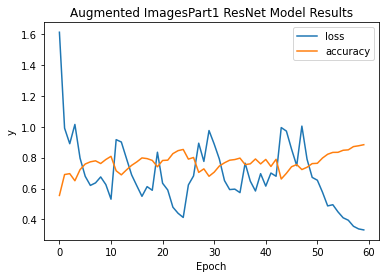

In [ ]:
loss_df = pd.DataFrame(history.history)
loss_df.plot(xlabel='Epoch',ylabel='y',title='Augmented ImagesPart1 ResNet Model Results')

In [ ]:
print('Loss average = ' + str(np.mean(loss_df['loss'])))
print('Accuracy average = ' + str(np.mean(loss_df['accuracy'])))
#print('Val Loss average = ' + str(np.mean(loss_df['val_loss'])))
#print('Val Accuracy average = ' + str(np.mean(loss_df['val_accuracy'])))


Loss average = 0.6899847815434138
Accuracy average = 0.7662583321332932


In [ ]:
2print('Accuracy MAX = ' + str(np.max(loss_df['accuracy'])))

Accuracy MAX = 0.8837500214576721


In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
# Saving a model
model.save(projectSharedDrivePath + '/data/Andres/Models/resnet_augImagesPart1_80_20.h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [ ]:
model1 = load_model(projectSharedDrivePath + '/data/Andres/Models/resnet_augImagesPart1_80_20.h5')

In [ ]:
model1.evaluate(X_train_augPart1,y_train_augPart1)